# Import Relevant Packages

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import Raw Data and Find Vinyl Peak

In [13]:
# Import raw data
df = pd.read_csv('t30_1.txt', delimiter = '\t') # Tab delimited.
df = df.drop(df.columns[0:3], axis=1) # Drop 1st 3 columns.
df

,99.626030,104.137245,108.646280,113.151013,117.653571,122.153957,126.650050,131.141856,135.635735,140.123212,...,2470.287077,2473.451562,2476.614819,2479.775228,2482.936030,2486.095606,2489.252338,2492.409464,2495.563749,2498.713580
0,404.0,454.0,618.0,576.0,587.0,727.0,689.0,710.0,822.0,824.0,...,1639.0,1612.0,1634.0,1491.0,1636.0,1652.0,1588.0,1682.0,1698.0,1683.0
1,436.0,392.0,607.0,568.0,606.0,718.0,677.0,855.0,837.0,824.0,...,1640.0,1653.0,1796.0,1720.0,1722.0,1645.0,1653.0,1698.0,1663.0,1778.0
2,368.0,468.0,618.0,601.0,640.0,811.0,715.0,768.0,801.0,897.0,...,1775.0,1708.0,1793.0,1760.0,1747.0,1756.0,1687.0,1714.0,1831.0,1846.0
3,344.0,519.0,550.0,567.0,599.0,809.0,677.0,824.0,767.0,896.0,...,1742.0,1825.0,1762.0,1773.0,1756.0,1784.0,1806.0,1860.0,1862.0,1899.0
4,453.0,455.0,610.0,583.0,620.0,736.0,722.0,861.0,794.0,909.0,...,1746.0,1761.0,1855.0,1738.0,1768.0,1818.0,1773.0,1929.0,1893.0,1905.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,382.0,429.0,518.0,425.0,543.0,669.0,603.0,691.0,641.0,731.0,...,893.0,965.0,994.0,977.0,993.0,962.0,1035.0,1029.0,929.0,1032.0
366,344.0,441.0,490.0,466.0,524.0,614.0,598.0,631.0,669.0,715.0,...,932.0,893.0,1039.0,977.0,998.0,981.0,1032.0,1031.0,988.0,1098.0
367,357.0,405.0,512.0,519.0,608.0,683.0,558.0,633.0,737.0,818.0,...,964.0,953.0,977.0,940.0,960.0,1024.0,1020.0,1069.0,1065.0,1058.0
368,335.0,375.0,494.0,501.0,574.0,662.0,560.0,621.0,699.0,691.0,...,872.0,969.0,922.0,999.0,1027.0,984.0,943.0,967.0,988.0,1035.0


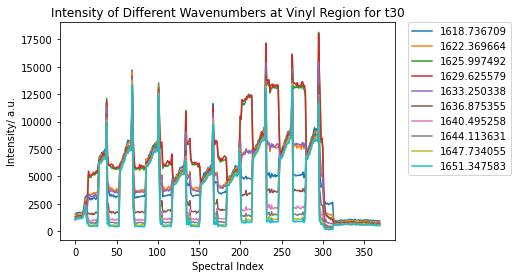

In [14]:
# Find out Vinyl Peak Wavenumber = ~1630 cm-1 Region

df.iloc[:, 375:385].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity/ a.u.')
plt.title('Intensity of Different Wavenumbers at Vinyl Region for t30')
plt.legend(bbox_to_anchor=(1.04,1), borderaxespad=0)
plt.show() 
# Plot all columns in the region to see which intensity is the highest. Pick that index location.
# The vinyl peak is the wavenumber with the highest intensity.

In [15]:
# df.loc[:,'1629.625579'] --> When using loc.
df.columns.get_loc('1629.625579') #--> Use the get_loc command on the column index to find the index location. 
# df.iloc[:,378] --> When using iloc

# Column index 378 is equivalent to column label '1629.625579'. Use relevant parameter for iloc and loc respectively.

378

# Filter Relevant Spectra

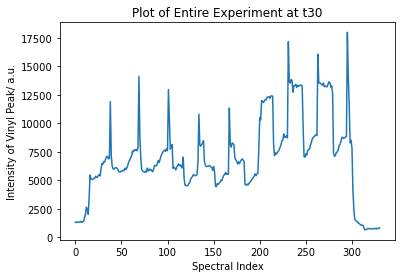

In [17]:
# Plot Vinyl Peak Wavenumber Column out.
df.loc[:330,'1629.625579'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Plot of Entire Experiment at t30')
plt.show()

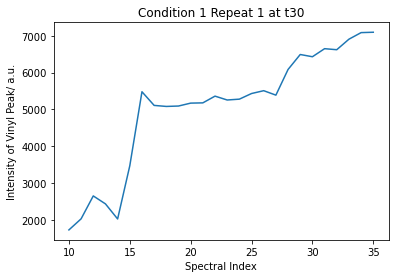

In [30]:
# Condition
df.loc[10:35,'1629.625579'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 1 Repeat 1 at t30')
plt.show()

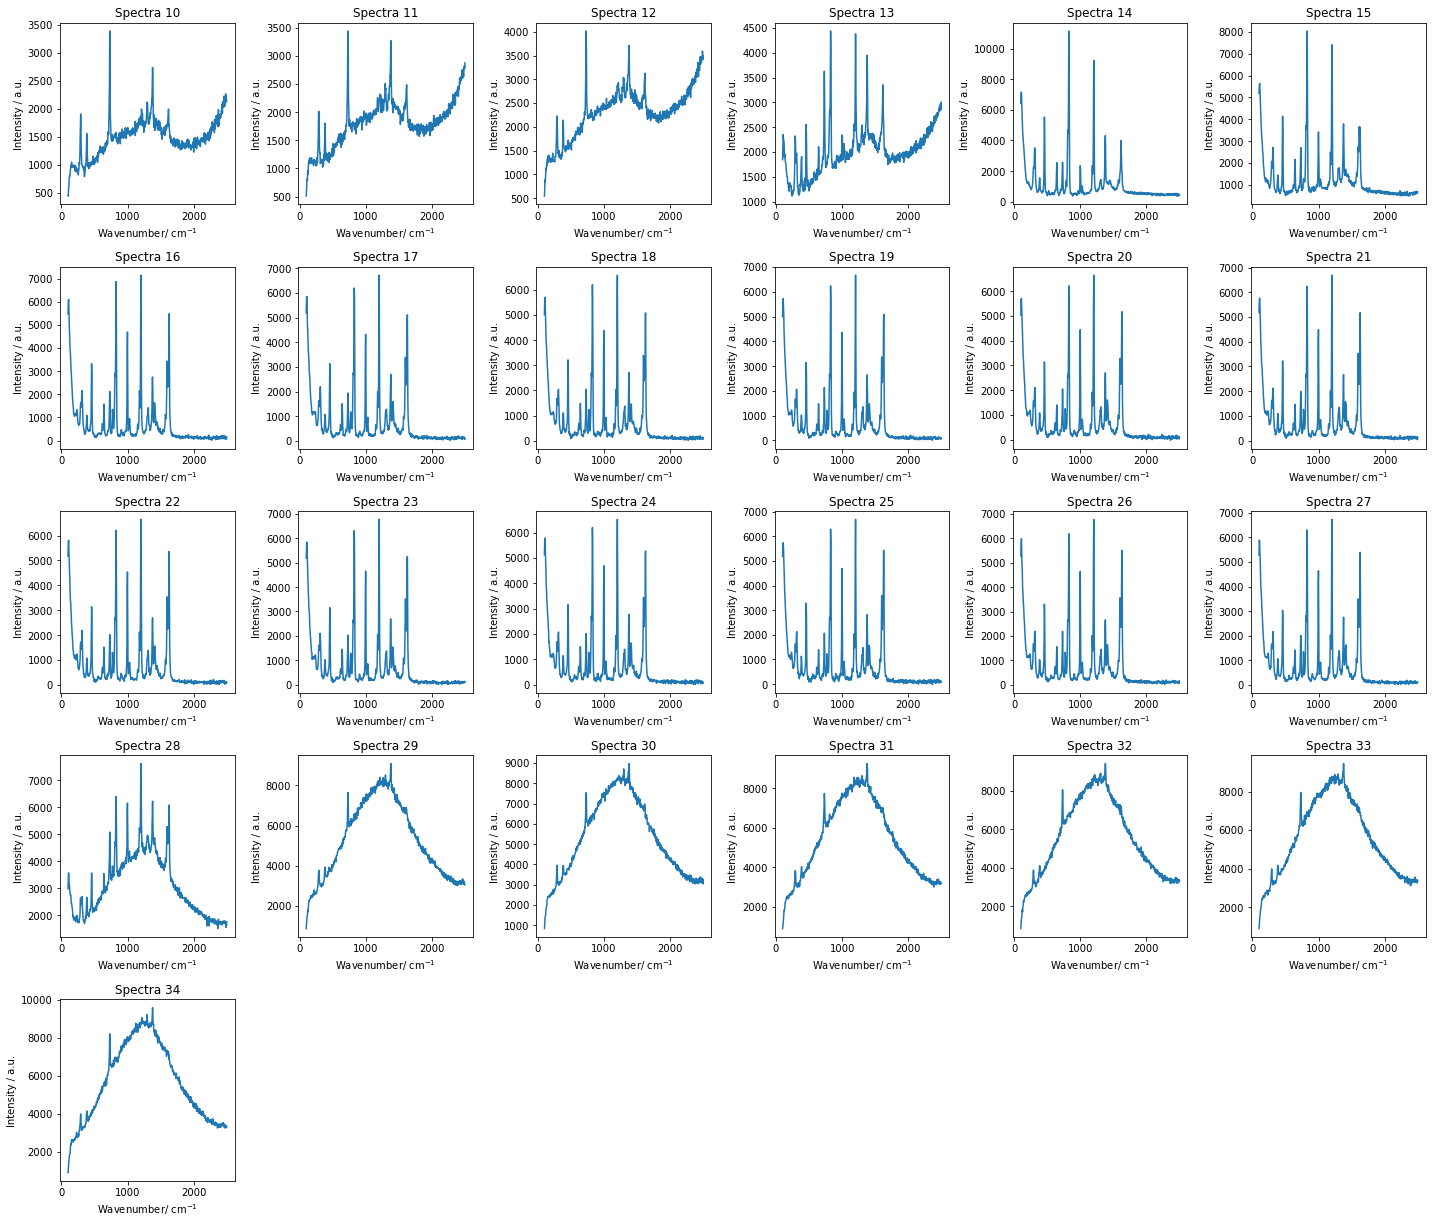

In [31]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(10, 35):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(6,6,(i-9))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [39]:
# Filter out relevant data to be stored and used for AUC analysis.

condition1_ss = df.loc[20:24, :]
condition1_ss.insert(loc = 0, column = 'Condition', value = 'C1_R1')
condition1_ss

,Condition,99.626030,104.137245,108.646280,113.151013,117.653571,122.153957,126.650050,131.141856,135.635735,...,2470.287077,2473.451562,2476.614819,2479.775228,2482.936030,2486.095606,2489.252338,2492.409464,2495.563749,2498.713580
20,C1_R1,5036.0,5636.0,5710.0,5306.0,4881.0,4516.0,3969.0,3591.0,3372.0,...,77.0,75.0,105.0,54.0,121.0,68.0,81.0,133.0,42.0,90.0
21,C1_R1,5186.0,5617.0,5763.0,5483.0,5048.0,4607.0,4000.0,3768.0,3407.0,...,114.0,108.0,114.0,109.0,70.0,143.0,92.0,141.0,32.0,125.0
22,C1_R1,5175.0,5676.0,5808.0,5412.0,5147.0,4575.0,4128.0,3808.0,3416.0,...,27.0,112.0,79.0,119.0,128.0,97.0,82.0,113.0,64.0,91.0
23,C1_R1,5192.0,5580.0,5840.0,5511.0,5053.0,4631.0,4024.0,3779.0,3572.0,...,102.0,99.0,80.0,121.0,125.0,105.0,86.0,139.0,89.0,119.0
24,C1_R1,5134.0,5673.0,5789.0,5394.0,5095.0,4573.0,3920.0,3757.0,3386.0,...,60.0,79.0,113.0,145.0,112.0,94.0,101.0,67.0,38.0,92.0


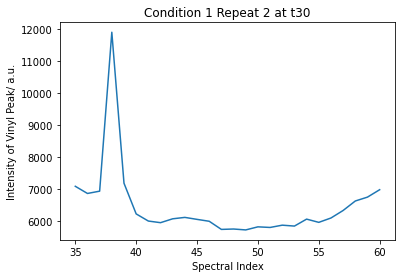

In [33]:
# Condition
df.loc[35:60,'1629.625579'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 1 Repeat 2 at t30')
plt.show()

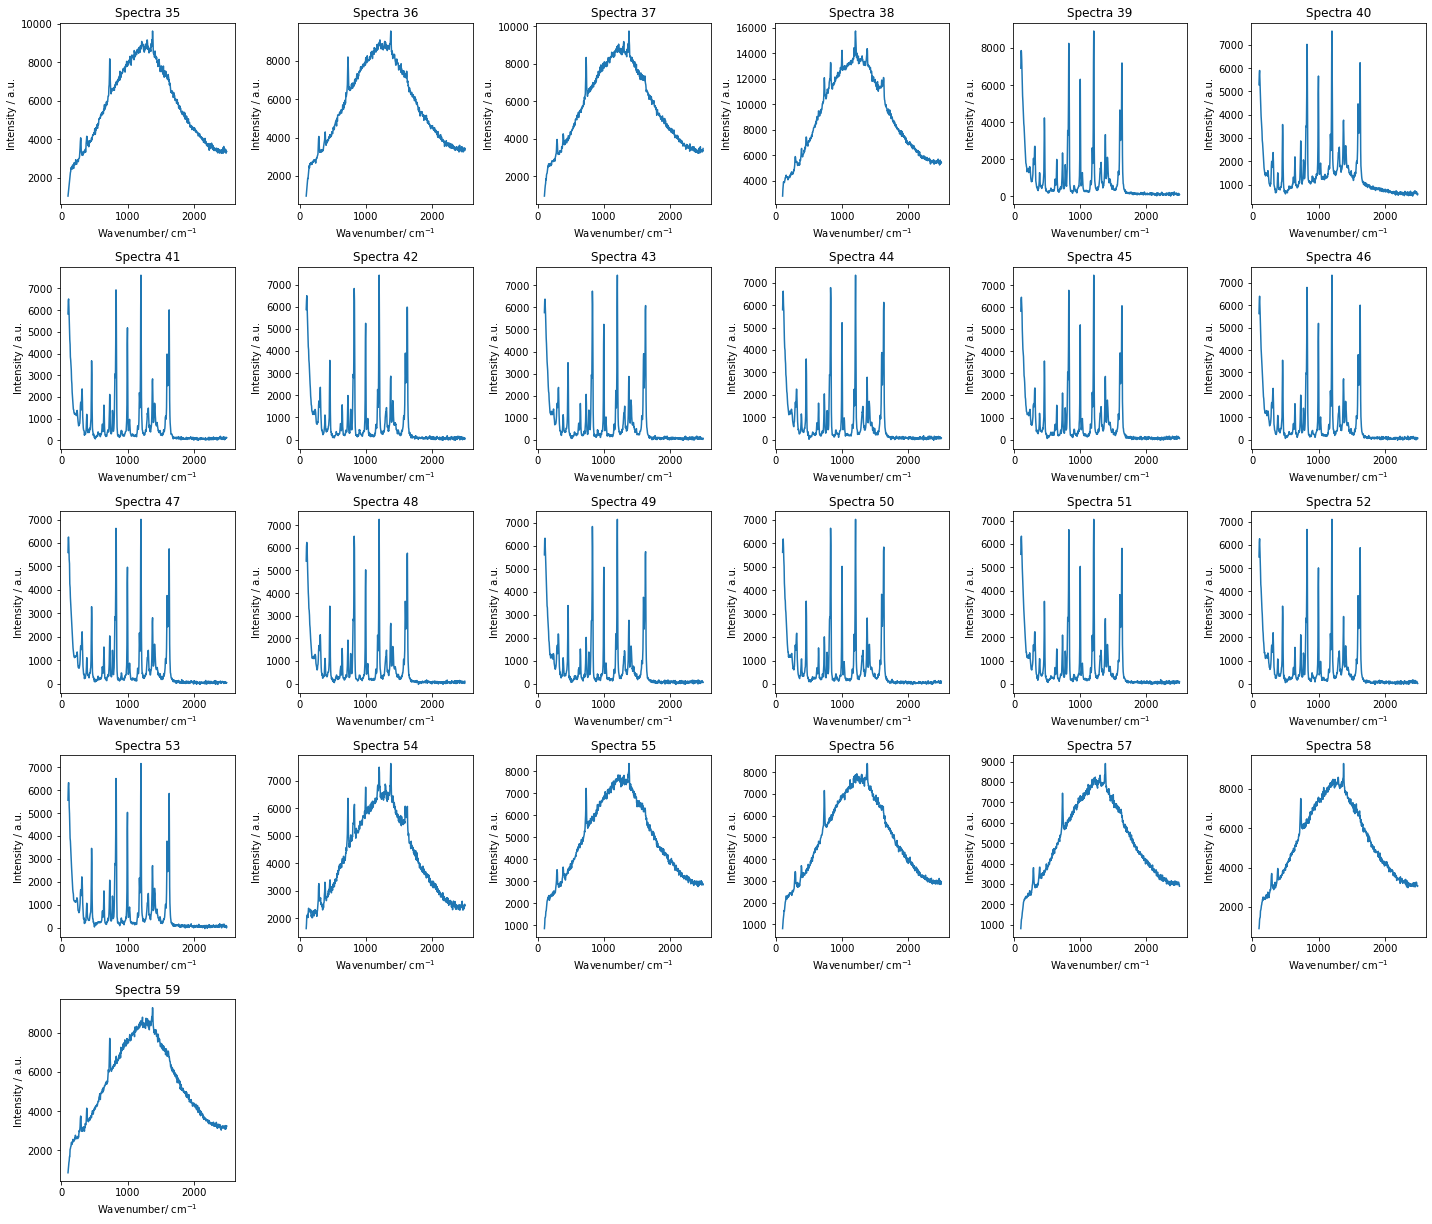

In [34]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(35, 60):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(6,6,(i-34))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [40]:
# Filter out relevant data to be stored and used for AUC analysis.

condition2_ss = df.loc[46:50, :]
condition2_ss.insert(loc = 0, column = 'Condition', value = 'C1_R2')
condition2_ss

,Condition,99.626030,104.137245,108.646280,113.151013,117.653571,122.153957,126.650050,131.141856,135.635735,...,2470.287077,2473.451562,2476.614819,2479.775228,2482.936030,2486.095606,2489.252338,2492.409464,2495.563749,2498.713580
46,C1_R2,5632.0,6198.0,6406.0,6017.0,5520.0,5019.0,4381.0,4078.0,3784.0,...,89.0,-13.0,77.0,53.0,92.0,65.0,85.0,74.0,24.0,67.0
47,C1_R2,5597.0,6238.0,6253.0,5815.0,5296.0,5120.0,4263.0,4098.0,3679.0,...,33.0,93.0,28.0,69.0,41.0,54.0,26.0,56.0,32.0,48.0
48,C1_R2,5415.0,6058.0,6238.0,6031.0,5360.0,4928.0,4383.0,4025.0,3763.0,...,54.0,35.0,67.0,62.0,87.0,101.0,73.0,54.0,9.0,101.0
49,C1_R2,5600.0,6253.0,6320.0,5879.0,5372.0,4886.0,4482.0,4000.0,3673.0,...,37.0,41.0,86.0,87.0,129.0,58.0,70.0,91.0,81.0,52.0
50,C1_R2,5608.0,6105.0,6177.0,5816.0,5309.0,5006.0,4294.0,4043.0,3642.0,...,72.0,62.0,38.0,114.0,40.0,128.0,63.0,107.0,31.0,114.0


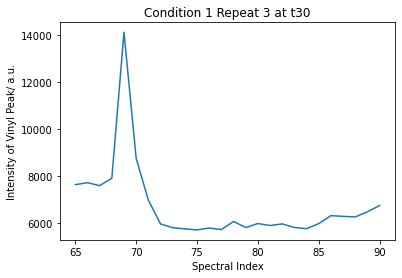

In [36]:
# Condition
df.loc[65:90,'1629.625579'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 1 Repeat 3 at t30')
plt.show()

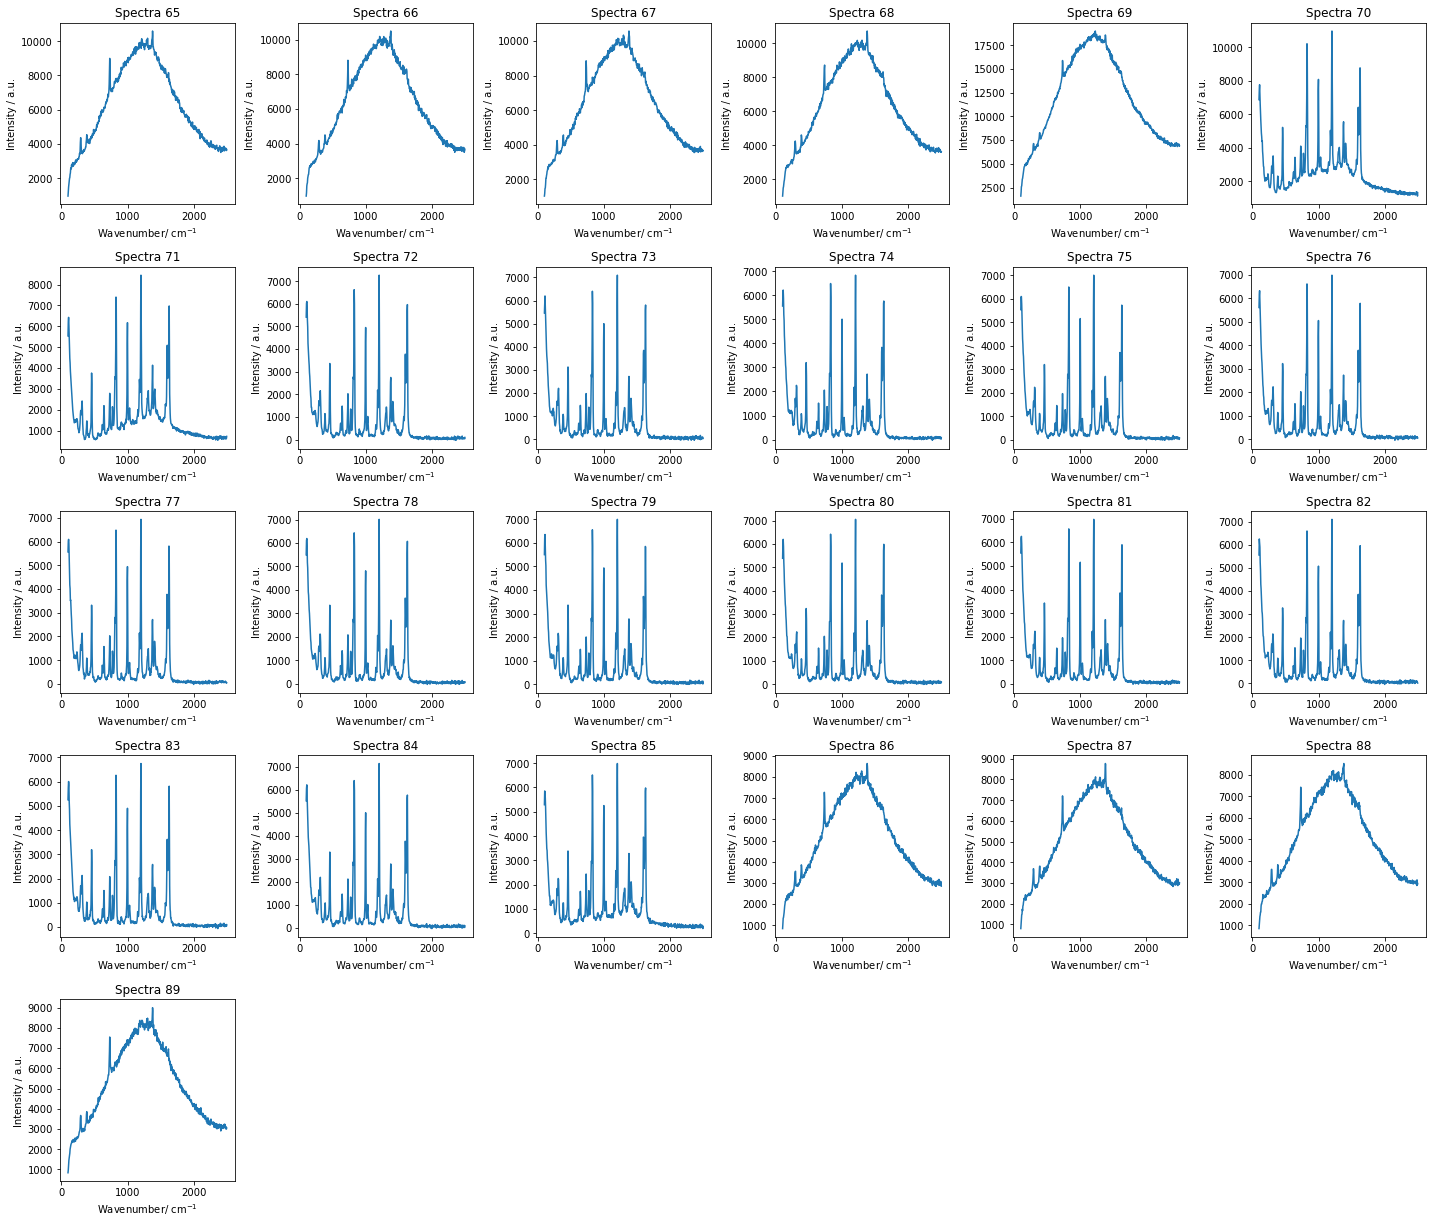

In [37]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(65, 90):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(6,6,(i-64))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [41]:
# Filter out relevant data to be stored and used for AUC analysis.

condition3_ss = df.loc[77:81, :]
condition3_ss.insert(loc = 0, column = 'Condition', value = 'C1_R3')
condition3_ss

,Condition,99.626030,104.137245,108.646280,113.151013,117.653571,122.153957,126.650050,131.141856,135.635735,...,2470.287077,2473.451562,2476.614819,2479.775228,2482.936030,2486.095606,2489.252338,2492.409464,2495.563749,2498.713580
77,C1_R3,5565.0,6005.0,6094.0,5907.0,5307.0,4924.0,4178.0,4013.0,3511.0,...,96.0,66.0,66.0,114.0,63.0,77.0,53.0,51.0,25.0,47.0
78,C1_R3,5497.0,6105.0,6193.0,5865.0,5174.0,4938.0,4312.0,3918.0,3780.0,...,68.0,39.0,86.0,39.0,75.0,61.0,59.0,81.0,39.0,81.0
79,C1_R3,5498.0,6211.0,6349.0,5750.0,5281.0,5022.0,4206.0,3955.0,3707.0,...,48.0,75.0,104.0,80.0,136.0,96.0,70.0,79.0,14.0,120.0
80,C1_R3,5383.0,6020.0,6195.0,5877.0,5237.0,4888.0,4371.0,4054.0,3650.0,...,58.0,40.0,84.0,99.0,120.0,109.0,79.0,38.0,81.0,90.0
81,C1_R3,5550.0,6149.0,6253.0,5945.0,5345.0,4880.0,4377.0,3963.0,3789.0,...,33.0,60.0,76.0,108.0,114.0,65.0,63.0,97.0,23.0,75.0


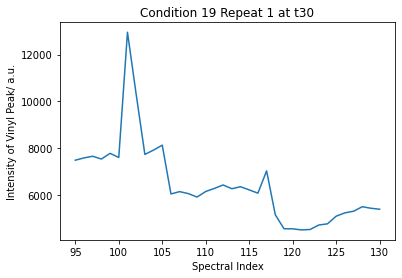

In [43]:
# Condition
df.loc[95:130,'1629.625579'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 19 Repeat 1 at t30')
plt.show()

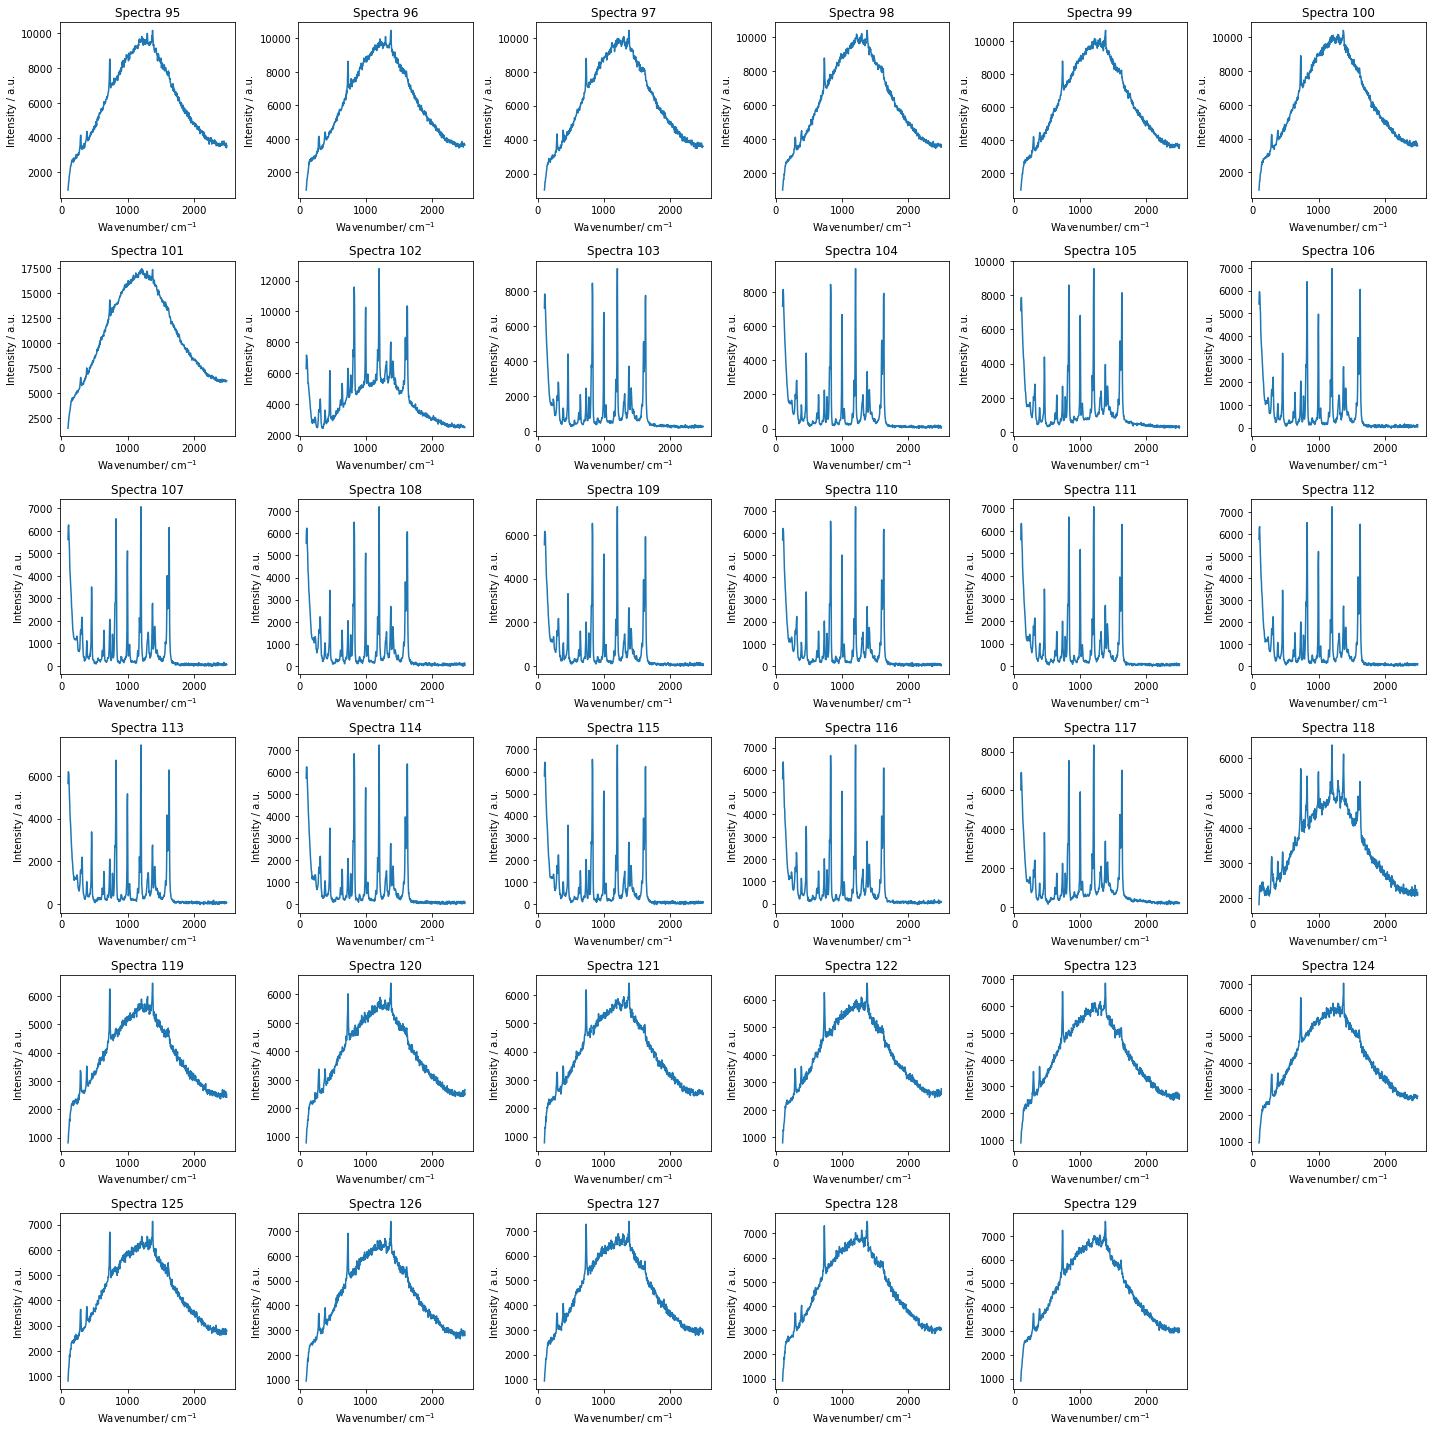

In [44]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(95, 130):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(6,6,(i-94))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [71]:
# Filter out relevant data to be stored and used for AUC analysis.

condition4_ss = df.loc[109:113, :]
condition4_ss.insert(loc = 0, column = 'Condition', value ='C19_R1')
condition4_ss

,Condition,99.626030,104.137245,108.646280,113.151013,117.653571,122.153957,126.650050,131.141856,135.635735,...,2470.287077,2473.451562,2476.614819,2479.775228,2482.936030,2486.095606,2489.252338,2492.409464,2495.563749,2498.713580
109,C19_R1,5554.0,6161.0,6144.0,6090.0,5459.0,4966.0,4429.0,4011.0,3773.0,...,62.0,30.0,22.0,85.0,90.0,50.0,33.0,84.0,1.0,84.0
110,C19_R1,5675.0,6116.0,6197.0,6020.0,5409.0,5013.0,4403.0,4050.0,3687.0,...,73.0,59.0,65.0,103.0,94.0,50.0,62.0,82.0,4.0,50.0
111,C19_R1,5614.0,6240.0,6331.0,6015.0,5393.0,5107.0,4397.0,4079.0,3751.0,...,77.0,51.0,69.0,106.0,103.0,78.0,65.0,56.0,20.0,101.0
112,C19_R1,5748.0,6231.0,6321.0,5882.0,5329.0,4835.0,4410.0,4013.0,3877.0,...,54.0,75.0,81.0,80.0,87.0,119.0,82.0,63.0,50.0,114.0
113,C19_R1,5645.0,6188.0,6183.0,6057.0,5424.0,5033.0,4602.0,4052.0,3876.0,...,13.0,113.0,44.0,106.0,70.0,98.0,40.0,78.0,63.0,75.0


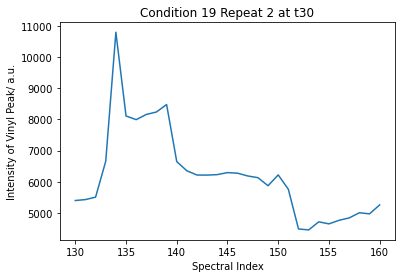

In [46]:
# Condition
df.loc[130:160,'1629.625579'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 19 Repeat 2 at t30')
plt.show()

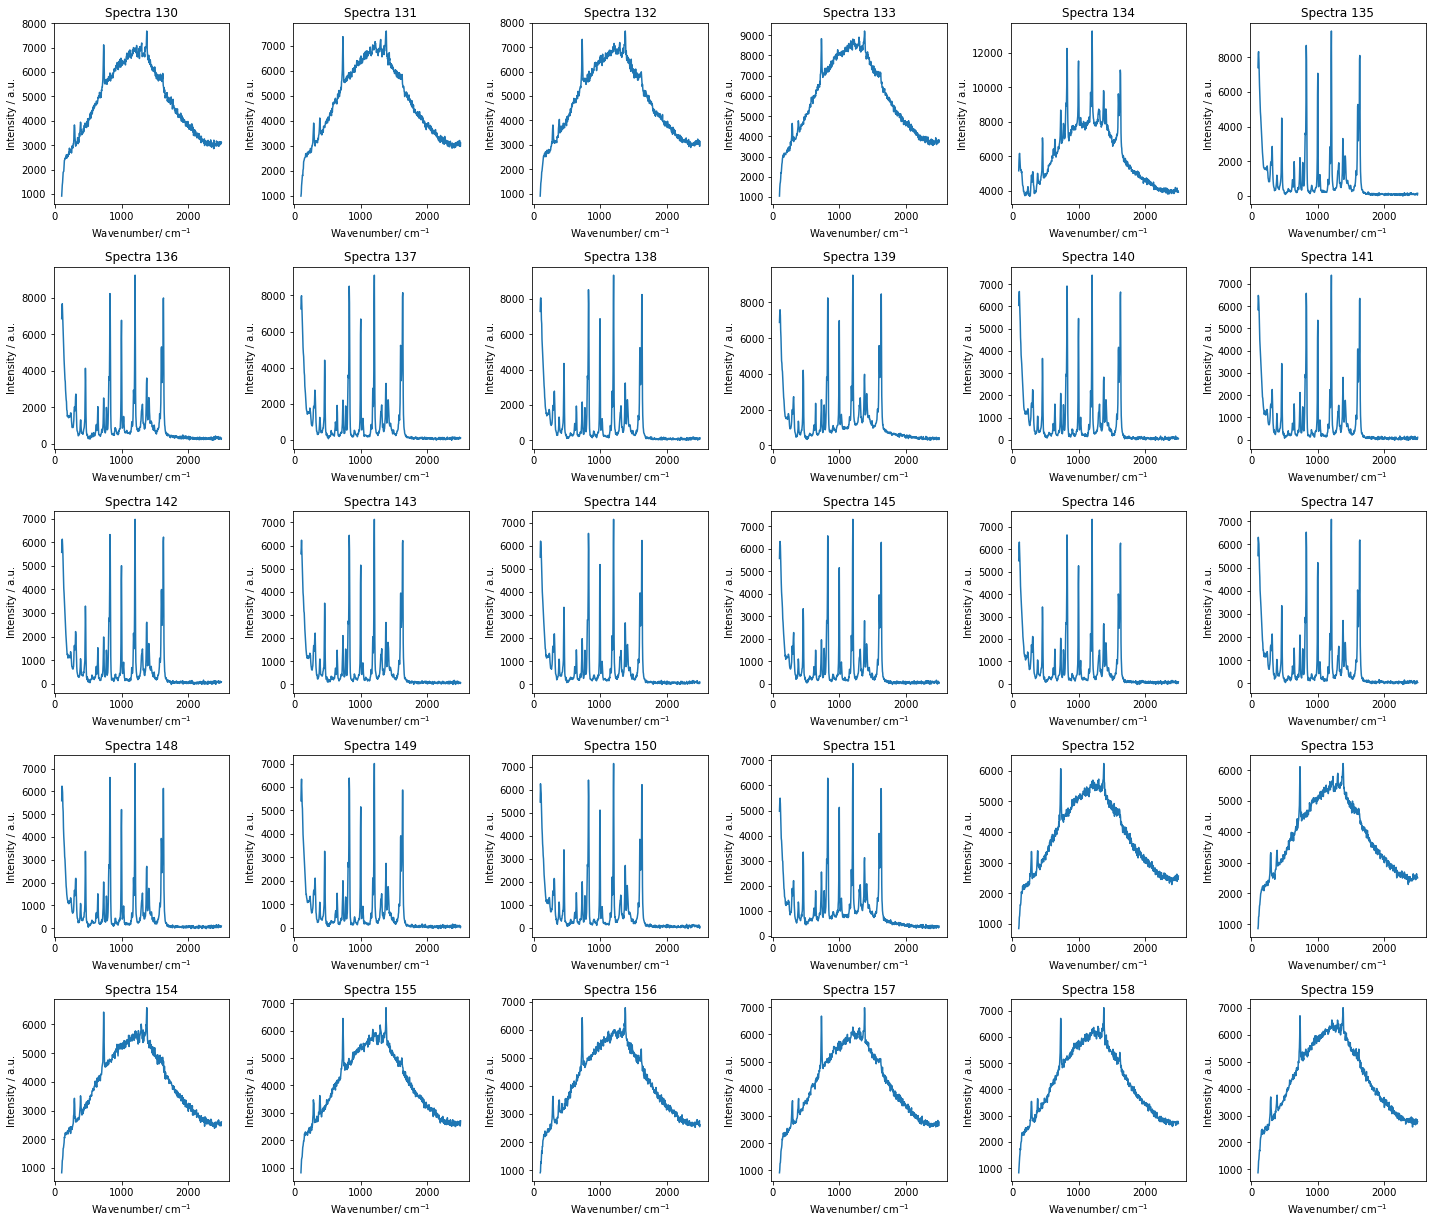

In [47]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(130, 160):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(6,6,(i-129))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [48]:
# Filter out relevant data to be stored and used for AUC analysis.

condition5_ss = df.loc[143:147, :]
condition5_ss.insert(loc = 0, column = 'Condition', value = 'C19_R2')
condition5_ss

,Condition,99.626030,104.137245,108.646280,113.151013,117.653571,122.153957,126.650050,131.141856,135.635735,...,2470.287077,2473.451562,2476.614819,2479.775228,2482.936030,2486.095606,2489.252338,2492.409464,2495.563749,2498.713580
143,C19_R2,5645.0,5890.0,6231.0,5774.0,5338.0,4968.0,4319.0,3961.0,3797.0,...,73.0,62.0,68.0,85.0,82.0,64.0,61.0,84.0,29.0,60.0
144,C19_R2,5508.0,6199.0,6178.0,5906.0,5428.0,5126.0,4493.0,4009.0,3775.0,...,48.0,62.0,49.0,49.0,24.0,94.0,39.0,49.0,32.0,86.0
145,C19_R2,5576.0,6210.0,6334.0,6147.0,5562.0,5011.0,4494.0,4078.0,3865.0,...,52.0,-11.0,100.0,89.0,88.0,113.0,68.0,73.0,18.0,59.0
146,C19_R2,5491.0,6117.0,6321.0,5901.0,5514.0,4991.0,4356.0,4048.0,3806.0,...,33.0,6.0,78.0,65.0,36.0,91.0,87.0,26.0,18.0,89.0
147,C19_R2,5514.0,6302.0,6149.0,6012.0,5374.0,4949.0,4588.0,4015.0,3783.0,...,-7.0,52.0,1.0,61.0,33.0,108.0,53.0,99.0,29.0,42.0


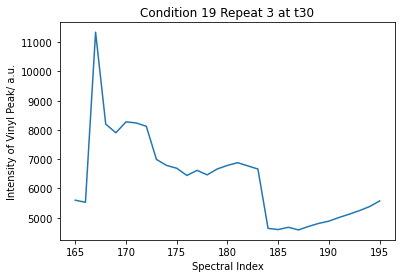

In [50]:
# Condition
df.loc[165:195,'1629.625579'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 19 Repeat 3 at t30')
plt.show()

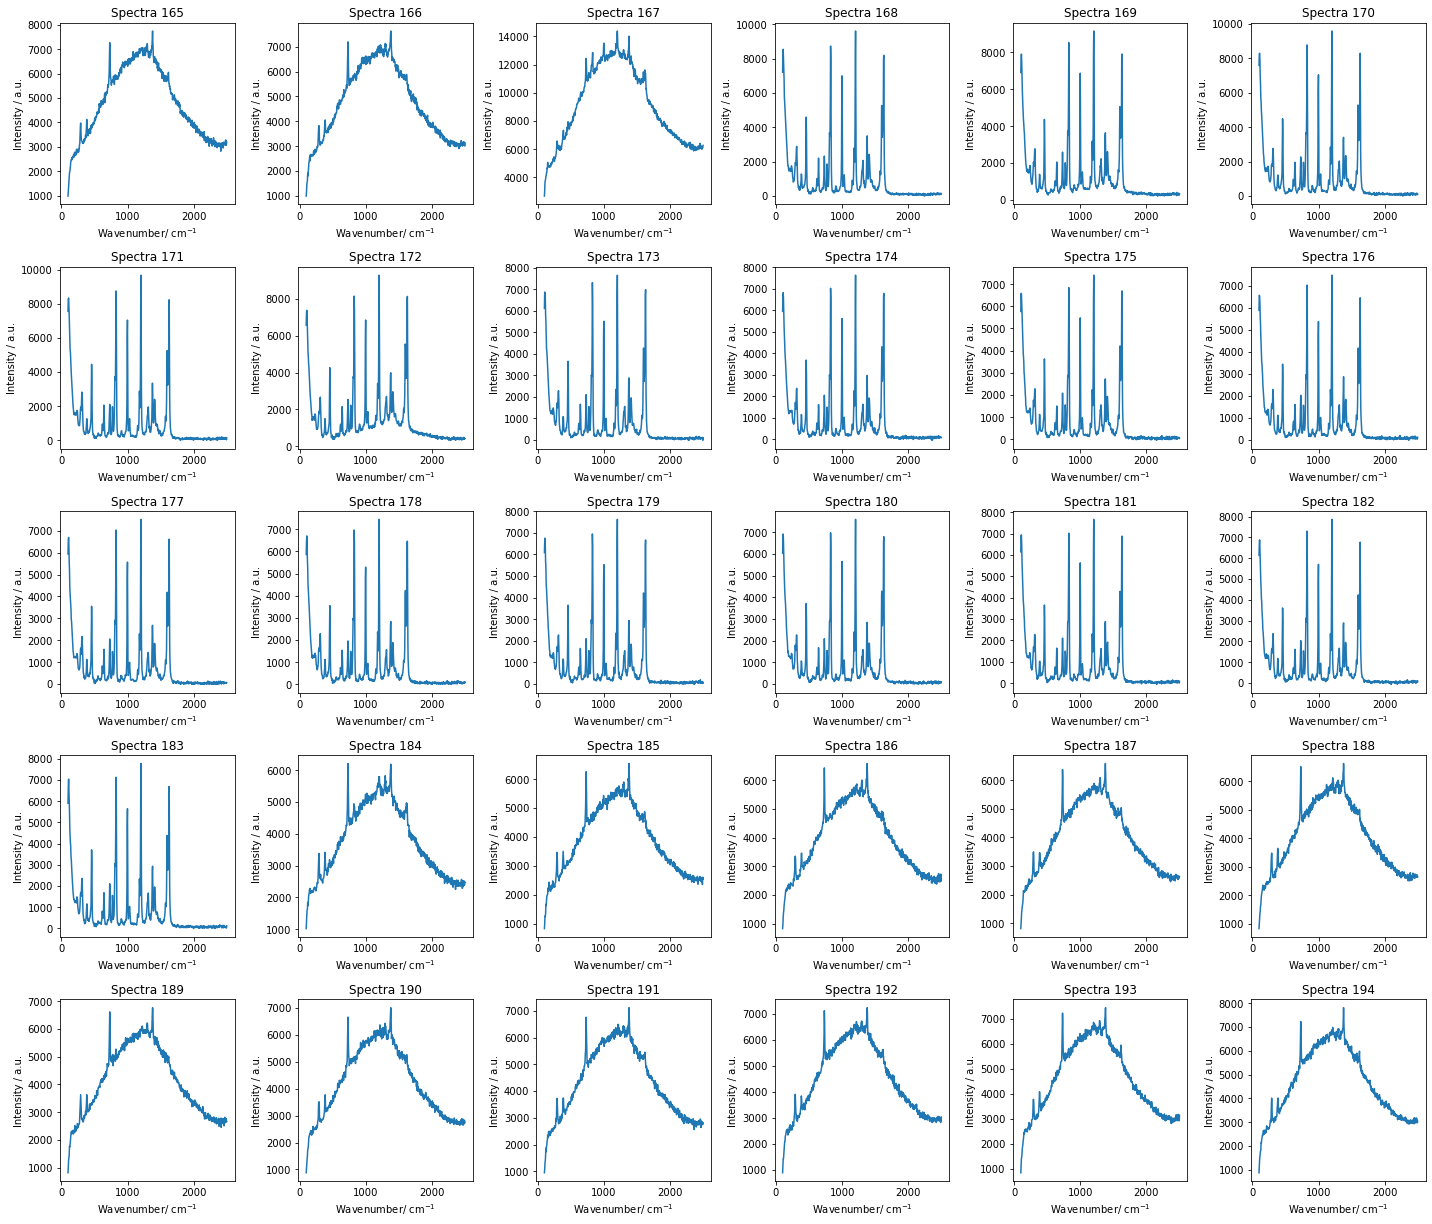

In [51]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(165, 195):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(6,6,(i-164))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [52]:
# Filter out relevant data to be stored and used for AUC analysis.

condition6_ss = df.loc[176:180, :]
condition6_ss.insert(loc = 0, column = 'Condition', value = 'C19_R3')
condition6_ss

,Condition,99.626030,104.137245,108.646280,113.151013,117.653571,122.153957,126.650050,131.141856,135.635735,...,2470.287077,2473.451562,2476.614819,2479.775228,2482.936030,2486.095606,2489.252338,2492.409464,2495.563749,2498.713580
176,C19_R3,5876.0,6558.0,6518.0,6209.0,5626.0,5285.0,4718.0,4374.0,3934.0,...,18.0,92.0,60.0,109.0,92.0,83.0,39.0,53.0,32.0,102.0
177,C19_R3,5944.0,6554.0,6695.0,6317.0,5599.0,5214.0,4416.0,4121.0,3896.0,...,32.0,51.0,64.0,67.0,65.0,63.0,35.0,68.0,41.0,60.0
178,C19_R3,5864.0,6435.0,6702.0,6325.0,5630.0,5267.0,4540.0,4248.0,4015.0,...,53.0,44.0,58.0,76.0,64.0,99.0,54.0,116.0,48.0,97.0
179,C19_R3,6088.0,6568.0,6754.0,6406.0,5664.0,5416.0,4603.0,4433.0,4078.0,...,70.0,52.0,77.0,107.0,67.0,72.0,87.0,108.0,25.0,51.0
180,C19_R3,6026.0,6669.0,6914.0,6501.0,5736.0,5235.0,4751.0,4373.0,4063.0,...,53.0,60.0,35.0,86.0,91.0,108.0,78.0,100.0,39.0,67.0


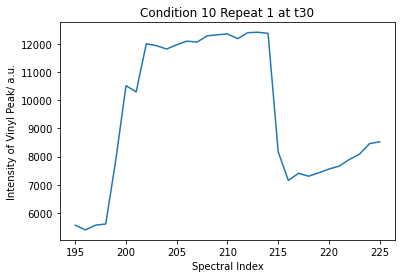

In [56]:
# Condition
df.loc[195:225,'1629.625579'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 10 Repeat 1 at t30')
plt.show()

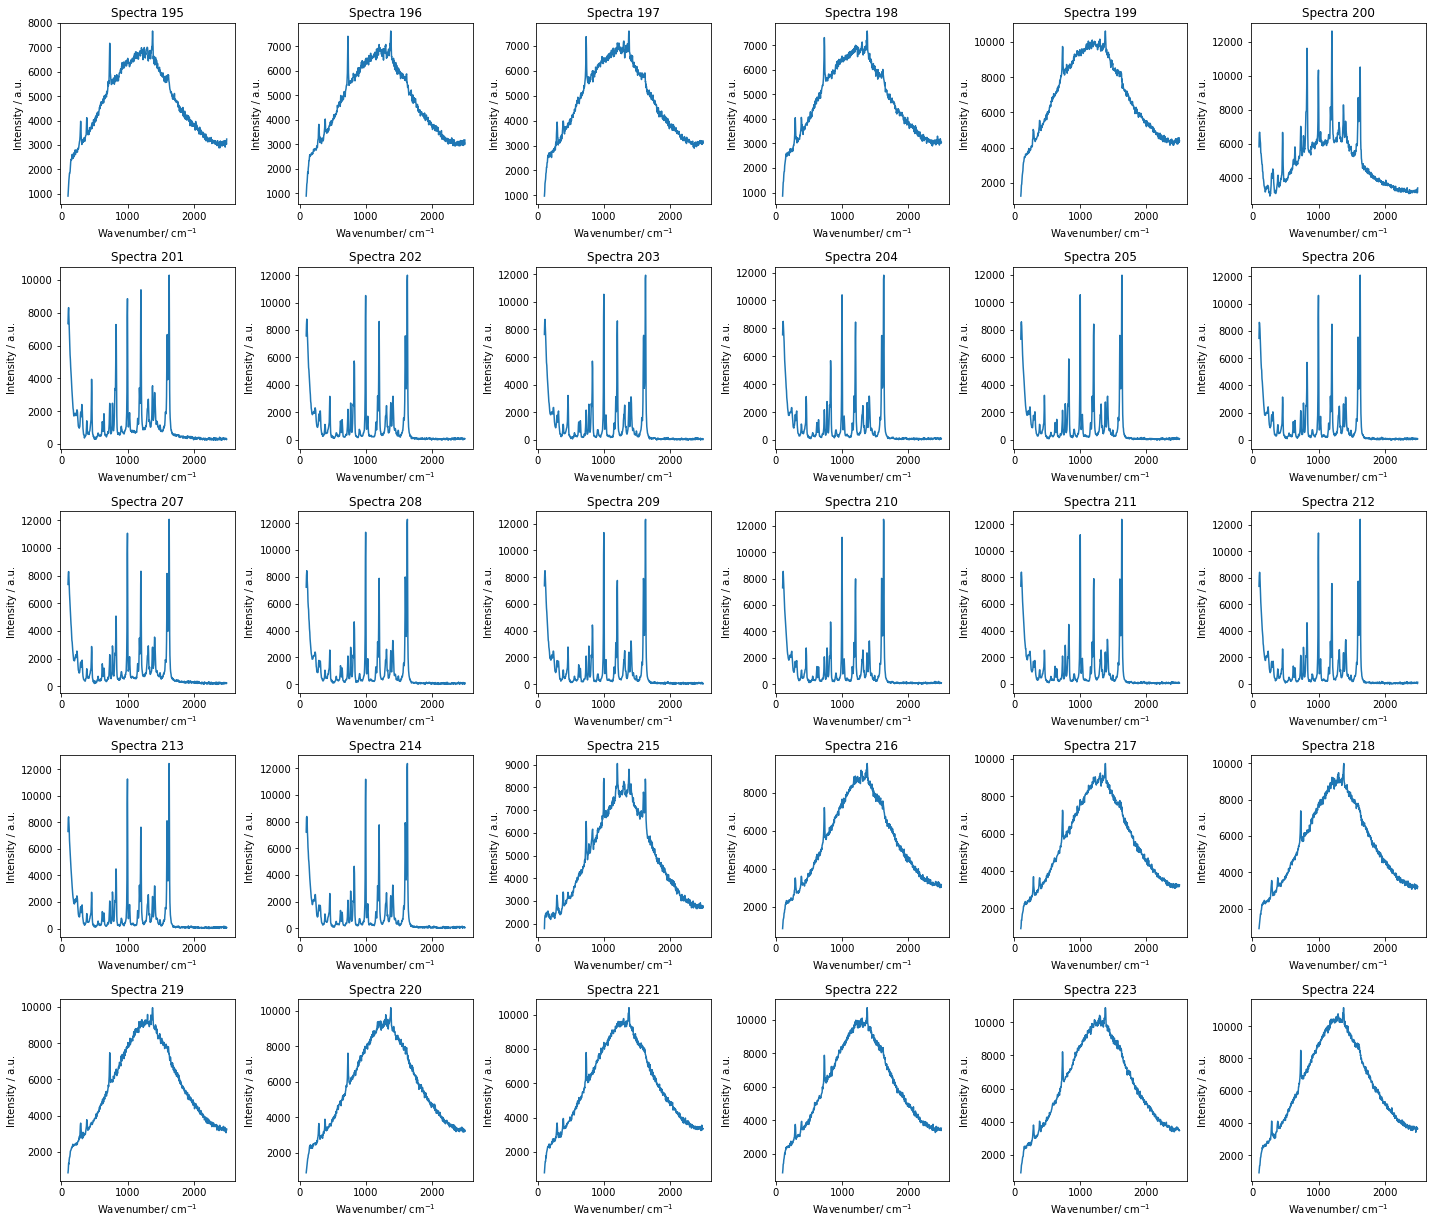

In [57]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(195, 225):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(6,6,(i-194))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [58]:
# Filter out relevant data to be stored and used for AUC analysis.

condition7_ss = df.loc[206:210, :]
condition7_ss.insert(loc = 0, column = 'Condition', value = 'C10_R1')
condition7_ss

,Condition,99.626030,104.137245,108.646280,113.151013,117.653571,122.153957,126.650050,131.141856,135.635735,...,2470.287077,2473.451562,2476.614819,2479.775228,2482.936030,2486.095606,2489.252338,2492.409464,2495.563749,2498.713580
206,C10_R1,7459.0,8629.0,8567.0,8178.0,7541.0,6865.0,6399.0,5677.0,5268.0,...,33.0,113.0,95.0,75.0,99.0,124.0,61.0,91.0,106.0,83.0
207,C10_R1,7357.0,8073.0,8283.0,7921.0,7245.0,6696.0,6231.0,5681.0,5249.0,...,236.0,204.0,263.0,207.0,202.0,261.0,198.0,191.0,196.0,226.0
208,C10_R1,7229.0,8114.0,8454.0,7991.0,7417.0,7016.0,6149.0,5763.0,5535.0,...,13.0,128.0,75.0,84.0,72.0,44.0,62.0,97.0,0.0,97.0
209,C10_R1,7353.0,8236.0,8479.0,8056.0,7402.0,6984.0,6195.0,5687.0,5381.0,...,42.0,35.0,131.0,87.0,124.0,90.0,81.0,89.0,-1.0,47.0
210,C10_R1,7306.0,8203.0,8553.0,8035.0,7665.0,6831.0,6229.0,5670.0,5327.0,...,39.0,114.0,83.0,138.0,119.0,101.0,81.0,101.0,49.0,81.0


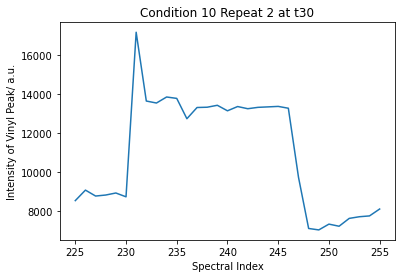

In [62]:
# Condition
df.loc[225:255,'1629.625579'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 10 Repeat 2 at t30')
plt.show()

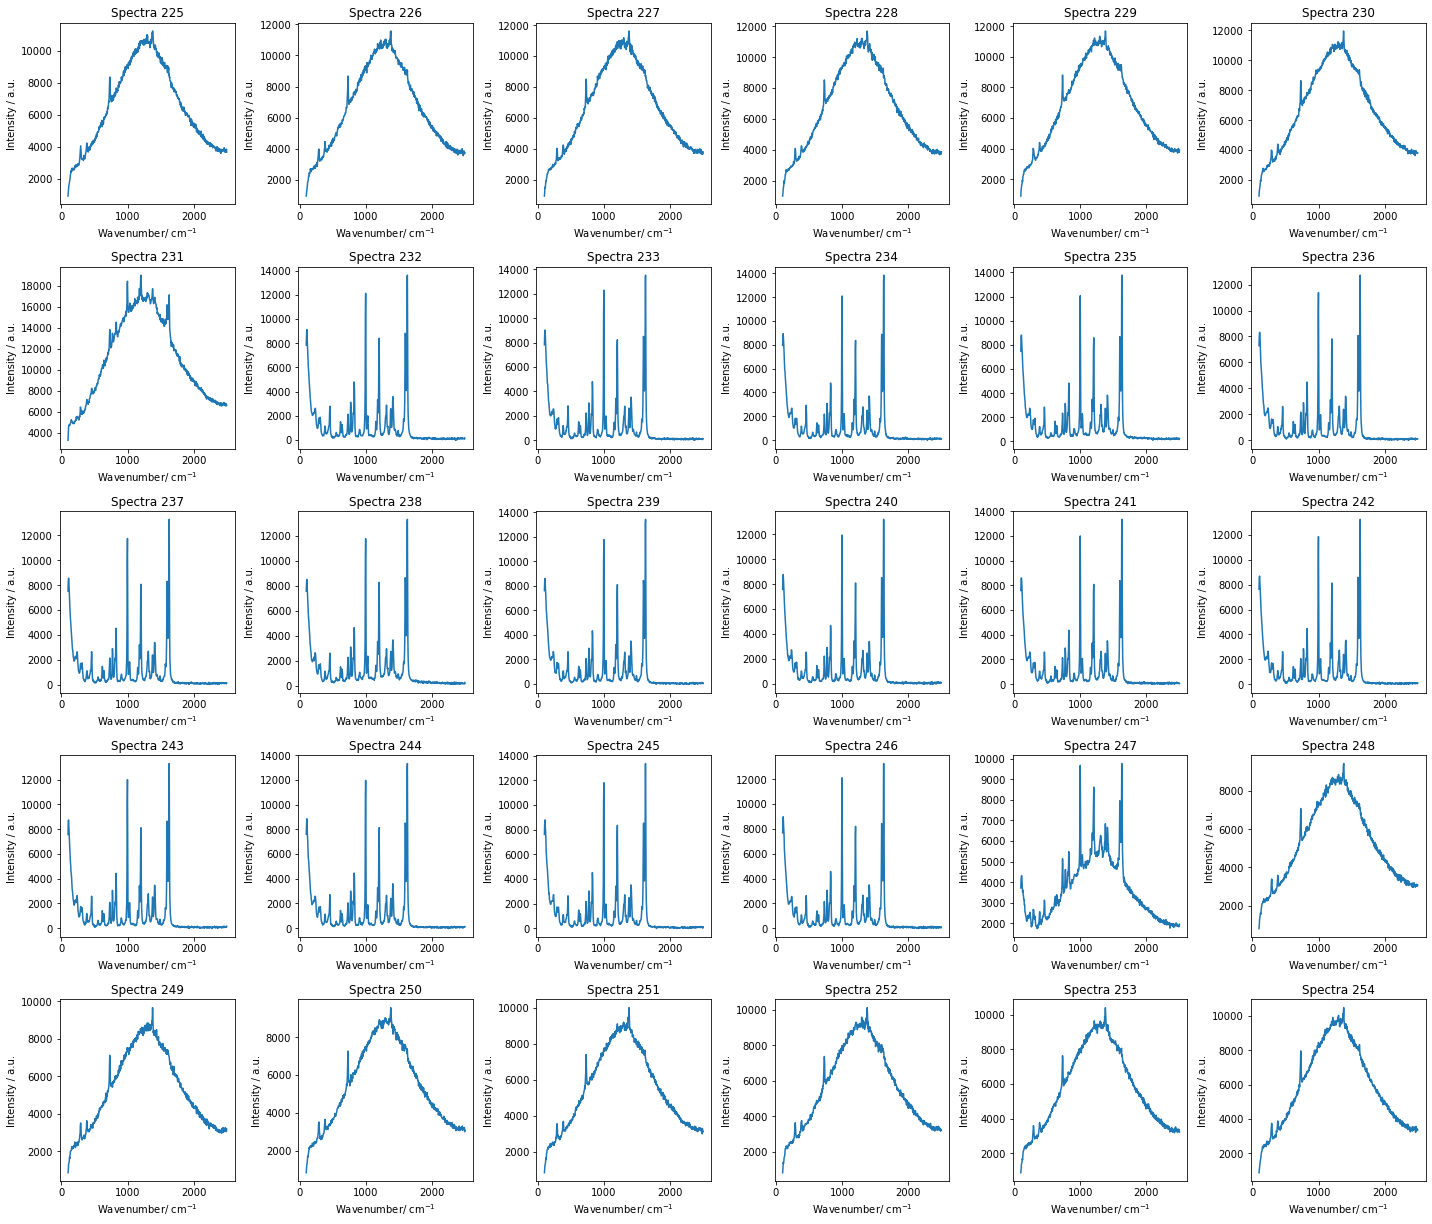

In [63]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(225, 255):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(6,6,(i-224))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [64]:
# Filter out relevant data to be stored and used for AUC analysis.

condition8_ss = df.loc[238:242, :]
condition8_ss.insert(loc = 0, column = 'Condition', value = 'C10_R2')
condition8_ss

,Condition,99.626030,104.137245,108.646280,113.151013,117.653571,122.153957,126.650050,131.141856,135.635735,...,2470.287077,2473.451562,2476.614819,2479.775228,2482.936030,2486.095606,2489.252338,2492.409464,2495.563749,2498.713580
238,C10_R2,7577.0,8167.0,8515.0,8117.0,7499.0,6876.0,6197.0,5781.0,5362.0,...,162.0,197.0,214.0,214.0,229.0,204.0,208.0,242.0,168.0,279.0
239,C10_R2,7607.0,8348.0,8596.0,8106.0,7631.0,7019.0,6171.0,5854.0,5422.0,...,69.0,75.0,71.0,128.0,102.0,62.0,59.0,75.0,21.0,82.0
240,C10_R2,7573.0,8428.0,8765.0,8330.0,7684.0,6950.0,6399.0,5948.0,5530.0,...,105.0,41.0,82.0,97.0,139.0,126.0,113.0,63.0,53.0,111.0
241,C10_R2,7582.0,8416.0,8604.0,8345.0,7582.0,7078.0,6466.0,5807.0,5479.0,...,78.0,84.0,108.0,92.0,105.0,94.0,44.0,41.0,16.0,51.0
242,C10_R2,7636.0,8555.0,8683.0,8185.0,7737.0,7067.0,6455.0,5884.0,5480.0,...,42.0,99.0,90.0,104.0,110.0,109.0,81.0,106.0,45.0,101.0


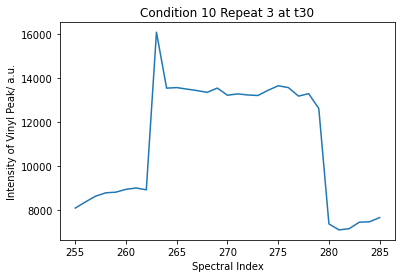

In [65]:
# Condition
df.loc[255:285,'1629.625579'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 10 Repeat 3 at t30')
plt.show()

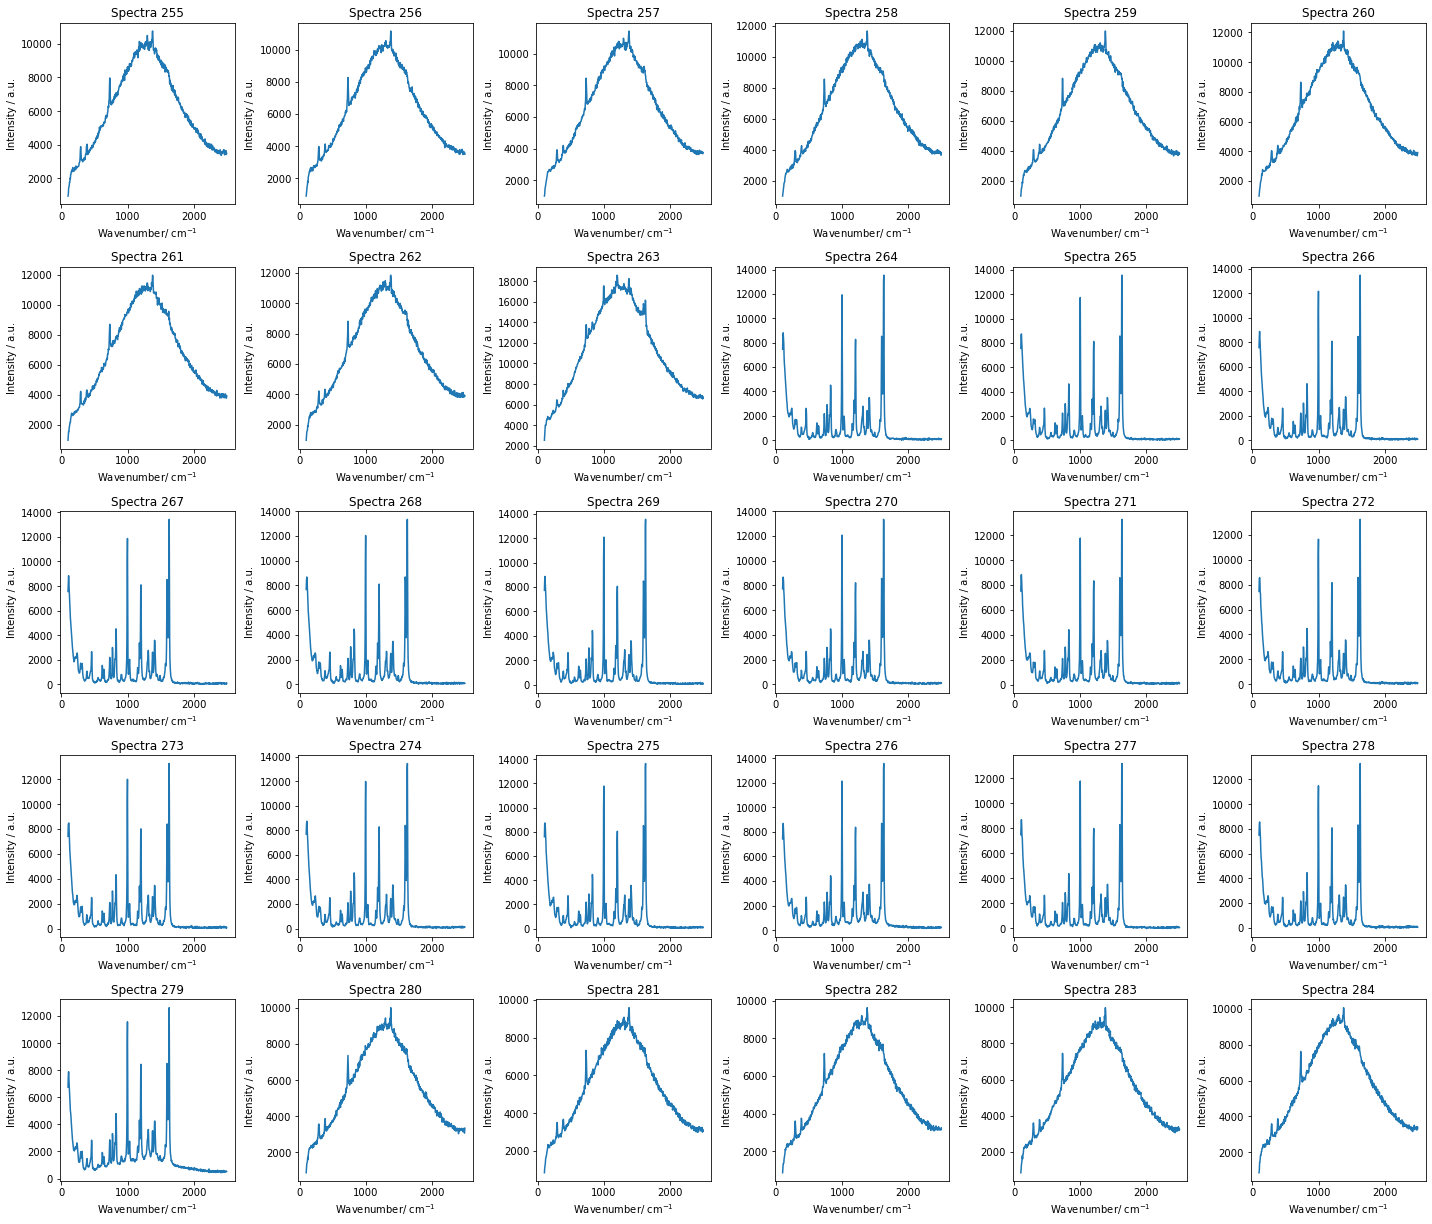

In [66]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(255, 285):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(6,6,(i-254))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [67]:
# Filter out relevant data to be stored and used for AUC analysis.

condition9_ss = df.loc[271:275, :]
condition9_ss.insert(loc = 0, column = 'Condition', value = 'C10_R3')
condition9_ss

,Condition,99.626030,104.137245,108.646280,113.151013,117.653571,122.153957,126.650050,131.141856,135.635735,...,2470.287077,2473.451562,2476.614819,2479.775228,2482.936030,2486.095606,2489.252338,2492.409464,2495.563749,2498.713580
271,C10_R3,7516.0,8690.0,8837.0,8333.0,7578.0,7271.0,6403.0,5940.0,5465.0,...,135.0,94.0,103.0,144.0,86.0,186.0,107.0,91.0,64.0,106.0
272,C10_R3,7453.0,8400.0,8557.0,8290.0,7415.0,7244.0,6349.0,5982.0,5568.0,...,103.0,65.0,131.0,128.0,157.0,118.0,100.0,103.0,53.0,115.0
273,C10_R3,7409.0,8340.0,8473.0,8470.0,7687.0,7058.0,6295.0,5894.0,5578.0,...,93.0,86.0,98.0,128.0,137.0,55.0,86.0,60.0,123.0,73.0
274,C10_R3,7689.0,8426.0,8736.0,8306.0,7766.0,7186.0,6529.0,5826.0,5605.0,...,85.0,83.0,129.0,92.0,155.0,160.0,89.0,94.0,94.0,123.0
275,C10_R3,7591.0,8707.0,8729.0,8457.0,7818.0,7145.0,6299.0,5950.0,5458.0,...,70.0,133.0,131.0,132.0,130.0,94.0,106.0,149.0,66.0,106.0


In [72]:
df_ = pd.concat([condition1_ss, condition2_ss, condition3_ss, condition4_ss, condition5_ss, condition6_ss, condition7_ss,
                condition8_ss, condition9_ss])
# Concatenate all relevant slug dataframes.

df_

,Condition,99.626030,104.137245,108.646280,113.151013,117.653571,122.153957,126.650050,131.141856,135.635735,...,2470.287077,2473.451562,2476.614819,2479.775228,2482.936030,2486.095606,2489.252338,2492.409464,2495.563749,2498.713580
20,C1_R1,5036.0,5636.0,5710.0,5306.0,4881.0,4516.0,3969.0,3591.0,3372.0,...,77.0,75.0,105.0,54.0,121.0,68.0,81.0,133.0,42.0,90.0
21,C1_R1,5186.0,5617.0,5763.0,5483.0,5048.0,4607.0,4000.0,3768.0,3407.0,...,114.0,108.0,114.0,109.0,70.0,143.0,92.0,141.0,32.0,125.0
22,C1_R1,5175.0,5676.0,5808.0,5412.0,5147.0,4575.0,4128.0,3808.0,3416.0,...,27.0,112.0,79.0,119.0,128.0,97.0,82.0,113.0,64.0,91.0
23,C1_R1,5192.0,5580.0,5840.0,5511.0,5053.0,4631.0,4024.0,3779.0,3572.0,...,102.0,99.0,80.0,121.0,125.0,105.0,86.0,139.0,89.0,119.0
24,C1_R1,5134.0,5673.0,5789.0,5394.0,5095.0,4573.0,3920.0,3757.0,3386.0,...,60.0,79.0,113.0,145.0,112.0,94.0,101.0,67.0,38.0,92.0
46,C1_R2,5632.0,6198.0,6406.0,6017.0,5520.0,5019.0,4381.0,4078.0,3784.0,...,89.0,-13.0,77.0,53.0,92.0,65.0,85.0,74.0,24.0,67.0
47,C1_R2,5597.0,6238.0,6253.0,5815.0,5296.0,5120.0,4263.0,4098.0,3679.0,...,33.0,93.0,28.0,69.0,41.0,54.0,26.0,56.0,32.0,48.0
48,C1_R2,5415.0,6058.0,6238.0,6031.0,5360.0,4928.0,4383.0,4025.0,3763.0,...,54.0,35.0,67.0,62.0,87.0,101.0,73.0,54.0,9.0,101.0
49,C1_R2,5600.0,6253.0,6320.0,5879.0,5372.0,4886.0,4482.0,4000.0,3673.0,...,37.0,41.0,86.0,87.0,129.0,58.0,70.0,91.0,81.0,52.0
50,C1_R2,5608.0,6105.0,6177.0,5816.0,5309.0,5006.0,4294.0,4043.0,3642.0,...,72.0,62.0,38.0,114.0,40.0,128.0,63.0,107.0,31.0,114.0


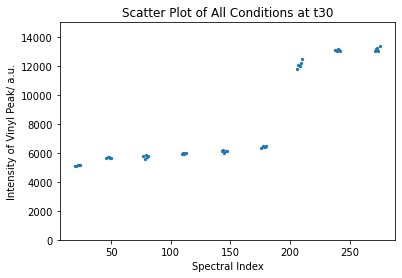

In [73]:
x = df_.index # Extract row indices (spectral index).
y = df_.iloc[:,378] # Extract intensity of vinyl peak.
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Scatter Plot of All Conditions at t30')
plt.ylim(0, 15000)

plt.scatter(x,y, s = 5) # Render a scatter plot between x and y, with size of dots = 5.
plt.show()

# Verify Manual Labeling Accuracy

In [74]:
df_['Condition'] = df_['Condition'].astype('category')
df_['Condition'].nunique()
# Verify number of unique categories. This must correspond with the number of conditions.

9

In [75]:
# Inspect df_.
df_

,Condition,99.626030,104.137245,108.646280,113.151013,117.653571,122.153957,126.650050,131.141856,135.635735,...,2470.287077,2473.451562,2476.614819,2479.775228,2482.936030,2486.095606,2489.252338,2492.409464,2495.563749,2498.713580
20,C1_R1,5036.0,5636.0,5710.0,5306.0,4881.0,4516.0,3969.0,3591.0,3372.0,...,77.0,75.0,105.0,54.0,121.0,68.0,81.0,133.0,42.0,90.0
21,C1_R1,5186.0,5617.0,5763.0,5483.0,5048.0,4607.0,4000.0,3768.0,3407.0,...,114.0,108.0,114.0,109.0,70.0,143.0,92.0,141.0,32.0,125.0
22,C1_R1,5175.0,5676.0,5808.0,5412.0,5147.0,4575.0,4128.0,3808.0,3416.0,...,27.0,112.0,79.0,119.0,128.0,97.0,82.0,113.0,64.0,91.0
23,C1_R1,5192.0,5580.0,5840.0,5511.0,5053.0,4631.0,4024.0,3779.0,3572.0,...,102.0,99.0,80.0,121.0,125.0,105.0,86.0,139.0,89.0,119.0
24,C1_R1,5134.0,5673.0,5789.0,5394.0,5095.0,4573.0,3920.0,3757.0,3386.0,...,60.0,79.0,113.0,145.0,112.0,94.0,101.0,67.0,38.0,92.0
46,C1_R2,5632.0,6198.0,6406.0,6017.0,5520.0,5019.0,4381.0,4078.0,3784.0,...,89.0,-13.0,77.0,53.0,92.0,65.0,85.0,74.0,24.0,67.0
47,C1_R2,5597.0,6238.0,6253.0,5815.0,5296.0,5120.0,4263.0,4098.0,3679.0,...,33.0,93.0,28.0,69.0,41.0,54.0,26.0,56.0,32.0,48.0
48,C1_R2,5415.0,6058.0,6238.0,6031.0,5360.0,4928.0,4383.0,4025.0,3763.0,...,54.0,35.0,67.0,62.0,87.0,101.0,73.0,54.0,9.0,101.0
49,C1_R2,5600.0,6253.0,6320.0,5879.0,5372.0,4886.0,4482.0,4000.0,3673.0,...,37.0,41.0,86.0,87.0,129.0,58.0,70.0,91.0,81.0,52.0
50,C1_R2,5608.0,6105.0,6177.0,5816.0,5309.0,5006.0,4294.0,4043.0,3642.0,...,72.0,62.0,38.0,114.0,40.0,128.0,63.0,107.0,31.0,114.0


In [76]:
# Generate summary statistics for the vinyl wavenumber.
df_[['Condition', '1629.625579']].groupby('Condition').describe()

1629.625579                                                  \
                count     mean         std      min      25%      50%   
Condition                                                               
C10_R1            5.0  12219.2  134.352894  12058.0  12092.0  12281.0   
C10_R2            5.0  13289.6  109.070161  13131.0  13238.0  13315.0   
C10_R3            5.0  13355.2  184.505284  13200.0  13225.0  13273.0   
C19_R1            5.0   6214.6  192.648125   5919.0   6156.0   6274.0   
C19_R2            5.0   6239.6   44.309141   6186.0   6214.0   6229.0   
C19_R3            5.0   6596.2  143.976387   6444.0   6464.0   6618.0   
C1_R1             5.0   5249.0   78.450621   5171.0   5178.0   5256.0   
C1_R2             5.0   5818.0  111.283422   5736.0   5752.0   5764.0   
C1_R3             5.0   5896.4  138.192981   5722.0   5809.0   5896.0   

                             
               75%      max  
Condition                    
C10_R1     12316.0  12349.0  
C10_R2     13350.0  13414.0  
C10_R3     13437.0  13641.0  
C19_R1      6289.0   6435.0  
C19_R2      6275.0   6294.0  
C19_R3      6667.0   6788.0  
C1_R1       5279.0   5361.0  
C1_R2       5832.0   6006.0  
C1_R3       5983.0   6072.0

In [77]:
# Write extracted dataframe to csv file.
df_.to_csv(r'C:\Users\Tan Jin Da\Desktop\High Throughput Experiments Data\210224 High Throughput Experiment Conditions 1, 19 and 10 Repeat\Raman\df_t30.csv')